# Assignment 3

In this assigment, we will work with the *Forest Fire* data set. Please download the data from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/162/forest+fires). Extract the data files into the subdirectory: `../data/fires/` (relative to `./src/`).

## Objective

+ The model objective is to predict the area affected by forest fires given the features set. 
+ The objective of this exercise is to assess your ability to construct and evaluate model pipelines.
+ Please note: the instructions are not meant to be 100% prescriptive, but instead they are a set of minimum requirements. If you find predictive performance gains by applying additional steps, by all means show them. 

## Variable Description

From the description file contained in the archive (`forestfires.names`), we obtain the following variable descriptions:

1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
3. month - month of the year: "jan" to "dec" 
4. day - day of the week: "mon" to "sun"
5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
6. DMC - DMC index from the FWI system: 1.1 to 291.3 
7. DC - DC index from the FWI system: 7.9 to 860.6 
8. ISI - ISI index from the FWI system: 0.0 to 56.10
9. temp - temperature in Celsius degrees: 2.2 to 33.30
10. RH - relative humidity in %: 15.0 to 100
11. wind - wind speed in km/h: 0.40 to 9.40 
12. rain - outside rain in mm/m2 : 0.0 to 6.4 
13. area - the burned area of the forest (in ha): 0.00 to 1090.84 









### Specific Tasks

+ Construct four model pipelines, out of combinations of the following components:

    + Preprocessors:

        - A simple processor that only scales numeric variables and recodes categorical variables.
        - A transformation preprocessor that scales numeric variables and applies a non-linear transformation.
    
    + Regressor:

        - A baseline regressor, which could be a [K-nearest neighbours model](https://open.spotify.com/track/4R3AU2pjv8ge2siX1fVbZs?si=b2712f32da0e4358) or a simple [linear regression model](https://scikit-learn.org/stable/modules/linear_model.html)
        - An advanced regressor of your choice (e.g., Random Forest, Neural Network, etc.)

+ Evaluate tune and evaluate each of the four model pipelines. 

    - Select a [performance metric](https://scikit-learn.org/stable/modules/linear_model.html) out of the following options: explained variance, max error, root mean squared error (RMSE), mean absolute error (MAE), r-squared.
    - *TIPS*: 
    
        * Out of the suggested metrics above, [some are correlation metrics, but this is a prediction problem](https://www.tmwr.org/performance#performance). Choose wisely (and don't choose the incorrect options.) 

+ Select the best-performing model and explain its predictions.

    - Provide local explanations.
    - Obtain global explanations and recommend a variable selection strategy.

+ Export your model as a pickle file.


You can work on the Jupyter notebook, as this experiment is fairly short (no need to use sacred). 

# Load the data

Assuming that the file `forestfire.cvs` are in `../data/fires/`, then you can use the code below to load them.

In [47]:
import pandas as pd
columns = [
    'coord_x', 'coord_y', 'month', 'day', 'ffmc', 'dmc', 'dc', 'isi', 'temp', 'rh', 'wind', 'rain', 'area' 
]

fires_dt = (pd.read_csv('C:/Users/kskor/my_directory/scaling_to_production/05_src/data/fires/forestfires.csv', header = None, names = columns))

In [48]:
import warnings
warnings.filterwarnings('ignore')

In [49]:

# List of columns that should be numeric
numeric_columns = ['coord_x', 'coord_y', 'ffmc', 'dmc', 'dc', 'isi', 'temp', 'rh', 'wind', 'rain', 'area']

# Convert these columns to numeric, coercing errors to NaN
fires_dt[numeric_columns] = fires_dt[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Handle NaNs if necessary, e.g., fill with mean
fires_dt[numeric_columns] = fires_dt[numeric_columns].fillna(fires_dt[numeric_columns].mean())


# Get X and Y

Create the features data frame and target data.

In [50]:

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.model_selection import train_test_split

df = fires_dt
X = df.drop(columns = 'area')
Y = df['area']

# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [51]:
# Ensure 'area' column is in the DataFrame
if 'area' not in fires_dt.columns:
    print("Error: 'area' column not found in the DataFrame.")
else:
    # List of columns that should be numeric
    numeric_columns = ['coord_x', 'coord_y', 'ffmc', 'dmc', 'dc', 'isi', 'temp', 'rh', 'wind', 'rain', 'area']

    # Convert these columns to numeric, coercing errors to NaN
    fires_dt[numeric_columns] = fires_dt[numeric_columns].apply(pd.to_numeric, errors='coerce')

    # Handle NaNs if necessary, e.g., fill with mean
    fires_dt[numeric_columns] = fires_dt[numeric_columns].fillna(fires_dt[numeric_columns].mean())

    # Define preprocessing steps
    numeric_features = numeric_columns[:-1]  # Exclude 'area' from numeric features
    categorical_features = ['month', 'day']  # List of categorical features


# Preprocessing

Create two [Column Transformers](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html), called preproc1 and preproc2, with the following guidelines:

- Numerical variables

    * (Preproc 1 and 2) Scaling: use a scaling method of your choice (Standard, Robust, Min-Max). 
    * Preproc 2 only: 
        
        + Choose a transformation for any of your input variables (or several of them). Evaluate if this transformation is convenient.
        + The choice of scaler is up to you.

- Categorical variables: 
    
    * (Preproc 1 and 2) Apply [one-hot encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) where appropriate.


+ The only difference between preproc1 and preproc2 is the non-linear transformation of the numerical variables.
    


### Preproc 1

Create preproc1 below.

+ Numeric: scaled variables, no other transforms.
+ Categorical: one-hot encoding.

In [52]:
#preproc1

numeric_transformer1 = Pipeline(steps=[
        ('scaler', StandardScaler())
    ])

categorical_transformer1 = Pipeline(steps=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

preproc1 = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer1, numeric_features),
            ('cat', categorical_transformer1, categorical_features)
        ])
preproc1

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['coord_x', 'coord_y', 'ffmc', 'dmc', 'dc',
                                  'isi', 'temp', 'rh', 'wind', 'rain']),
                                ('cat',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['month', 'day'])])

### Preproc 2

Create preproc2 below.

+ Numeric: scaled variables, non-linear transformation to one or more variables.
+ Categorical: one-hot encoding.

In [53]:
# preproc2

# Define transformers for numeric and categorical features
numeric_transformer2 = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('power', PowerTransformer(method='yeo-johnson'))  # Example of a power transformation
])

categorical_transformer2 = Pipeline(steps=[
    ('onehot', OneHotEncoder())
])

# Create ColumnTransformer to apply different preprocessing steps to different columns
preproc2 = ColumnTransformer(
    transformers=[
        ('num_transforms', numeric_transformer2, numeric_features),
        ('cat_transforms', categorical_transformer2, categorical_features)
    ])
preproc2

ColumnTransformer(transformers=[('num_transforms',
                                 Pipeline(steps=[('scaler', StandardScaler()),
                                                 ('power',
                                                  PowerTransformer())]),
                                 ['coord_x', 'coord_y', 'ffmc', 'dmc', 'dc',
                                  'isi', 'temp', 'rh', 'wind', 'rain']),
                                ('cat_transforms',
                                 Pipeline(steps=[('onehot', OneHotEncoder())]),
                                 ['month', 'day'])])

## Model Pipeline


Create a [model pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html): 

+ Add a step labelled `preprocessing` and assign the Column Transformer from the previous section.
+ Add a step labelled `regressor` and assign a regression model to it. 

## Regressor

+ Use a regression model to perform a prediction. 

    - Choose a baseline regressor, tune it (if necessary) using grid search, and evaluate it using cross-validation.
    - Choose a more advance regressor, tune it (if necessary) using grid search, and evaluate it using cross-validation.
    - Both model choices are up to you, feel free to experiment.

In [54]:
# Pipeline A = preproc1 + baseline

Pipeline_A = Pipeline(steps=[('preprocessing', preproc1),
                                  ('regressor', LinearRegression())])
Pipeline_A

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['coord_x', 'coord_y', 'ffmc',
                                                   'dmc', 'dc', 'isi', 'temp',
                                                   'rh', 'wind', 'rain']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['month', 'day'])])),
                ('regressor', LinearRegression())])

In [55]:
# Pipeline B = preproc2 + baseline

Pipeline_B = Pipeline(steps=[('preprocessing', preproc2),
                                  ('regressor', LinearRegression())])
Pipeline_B

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num_transforms',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('power',
                                                                   PowerTransformer())]),
                                                  ['coord_x', 'coord_y', 'ffmc',
                                                   'dmc', 'dc', 'isi', 'temp',
                                                   'rh', 'wind', 'rain']),
                                                 ('cat_transforms',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['month', 'day'])])),
                ('regressor', LinearRegression())])

In [56]:
# Pipeline C = preproc1 + advanced model

Pipeline_C = Pipeline(steps=[('preprocessing', preproc1),
                                  ('regressor', RandomForestRegressor(random_state=42))])
Pipeline_C

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['coord_x', 'coord_y', 'ffmc',
                                                   'dmc', 'dc', 'isi', 'temp',
                                                   'rh', 'wind', 'rain']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['month', 'day'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [57]:
# Pipeline D = preproc2 + advanced model
Pipeline_D = Pipeline(steps=[('preprocessing', preproc2),
                                  ('regressor', RandomForestRegressor(random_state=42))])
Pipeline_D

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num_transforms',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('power',
                                                                   PowerTransformer())]),
                                                  ['coord_x', 'coord_y', 'ffmc',
                                                   'dmc', 'dc', 'isi', 'temp',
                                                   'rh', 'wind', 'rain']),
                                                 ('cat_transforms',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['month', 'day'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

# Tune Hyperparams

+ Perform GridSearch on each of the four pipelines. 
+ Tune at least one hyperparameter per pipeline.
+ Experiment with at least four value combinations per pipeline.

In [58]:
from sklearn.metrics import mean_squared_error, make_scorer
rmse_scorer = make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)), greater_is_better=False)

In [59]:
param_grid_A = {
    'regressor__fit_intercept': [True, False],
}
grid_A = GridSearchCV(estimator=Pipeline_A,
                      param_grid=param_grid_A,
                      scoring=rmse_scorer,
                      cv=5,
                      refit=True  # Refit with best parameters
                      )
grid_A.fit(X_train, Y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['coord_x',
                                                                          'coord_y',
                                                                          'ffmc',
                                                                          'dmc',
                                                                          'dc',
                                                                          'isi',
                                                                          'temp',
                                                                          'rh',
                                                                          'wind',
                                                                          'rain']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['month',
                                                                          'day'])])),
                                       ('regressor', LinearRegression())]),
             param_grid={'regressor__fit_intercept': [True, False]},
             scoring=make_scorer(<lambda>, greater_is_better=False, response_method='predict'))

In [60]:
param_grid_B = {
    'regressor__fit_intercept': [True, False],
    'regressor__copy_X': [True, False],
    'regressor__n_jobs': [None, 1, 2, 4],
    'regressor__positive': [False]
}
grid_B = GridSearchCV(estimator=Pipeline_B,
                      param_grid=param_grid_B,
                      scoring=rmse_scorer,
                      cv=5,
                      refit=True  # Refit with best parameters
                      )
grid_B.fit(X_train, Y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num_transforms',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler()),
                                                                                         ('power',
                                                                                          PowerTransformer())]),
                                                                         ['coord_x',
                                                                          'coord_y',
                                                                          'ffmc',
                                                                          'dmc',
                                                                          'dc',
                                                                          'isi',
                                                                          'temp',
                                                                          'rh',
                                                                          'wind',
                                                                          'rain']),
                                                                        ('cat_transforms',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder())]),
                                                                         ['month',
                                                                          'day'])])),
                                       ('regressor', LinearRegression())]),
             param_grid={'regressor__copy_X': [True, False],
                         'regressor__fit_intercept': [True, False],
                         'regressor__n_jobs': [None, 1, 2, 4],
                         'regressor__positive': [False]},
             scoring=make_scorer(<lambda>, greater_is_better=False, response_method='predict'))

In [61]:
param_grid_C = {
    'regressor__n_estimators': [50, 100, 200],
    'regressor__max_depth': [None, 10, 20, 30],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4],
    'regressor__bootstrap': [True, False]
}
grid_C = GridSearchCV(estimator=Pipeline_C,
                      param_grid=param_grid_C,
                      scoring=rmse_scorer,
                      cv=5,
                      refit=True  # Refit with best parameters
                      )
grid_C.fit(X_train, Y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['coord_x',
                                                                          'coord_y',
                                                                          'ffmc',
                                                                          'dmc',
                                                                          'dc',
                                                                          'isi',
                                                                          'temp',
                                                                          'rh',
                                                                          'wind',
                                                                          'rain']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['month',
                                                                          'day'])])),
                                       ('regressor',
                                        RandomForestRegressor(random_state=42))]),
             param_grid={'regressor__bootstrap': [True, False],
                         'regressor__max_depth': [None, 10, 20, 30],
                         'regressor__min_samples_leaf': [1, 2, 4],
                         'regressor__min_samples_split': [2, 5, 10],
                         'regressor__n_estimators': [50, 100, 200]},
             scoring=make_scorer(<lambda>, greater_is_better=False, response_method='predict'))

In [62]:

param_grid_D = {
    'regressor__n_estimators': [50, 100, 200],
    'regressor__max_depth': [None, 10, 20, 30],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4],
    'regressor__bootstrap': [True, False]
}
grid_D = GridSearchCV(estimator=Pipeline_D,
                      param_grid=param_grid_D,
                      scoring=rmse_scorer,
                      cv=5,
                      refit=True  # Refit with best parameters
                      )
grid_D.fit(X_train, Y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num_transforms',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler()),
                                                                                         ('power',
                                                                                          PowerTransformer())]),
                                                                         ['coord_x',
                                                                          'coord_y',
                                                                          'ffmc',
                                                                          'dmc',
                                                                          'dc',
                                                                          'isi',
                                                                          'temp',
                                                                          'rh',
                                                                          'wind',
                                                                          'rain']),
                                                                        ('cat_transforms',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder())]),
                                                                         ['month',
                                                                          'day'])])),
                                       ('regressor',
                                        RandomForestRegressor(random_state=42))]),
             param_grid={'regressor__bootstrap': [True, False],
                         'regressor__max_depth': [None, 10, 20, 30],
                         'regressor__min_samples_leaf': [1, 2, 4],
                         'regressor__min_samples_split': [2, 5, 10],
                         'regressor__n_estimators': [50, 100, 200]},
             scoring=make_scorer(<lambda>, greater_is_better=False, response_method='predict'))

# Evaluate

+ Which model has the best performance?

In [63]:
 #Evaluate and select best model based on RMSE
results = {
    'Pipeline_A': np.sqrt(-grid_A.best_score_),
    'Pipeline_B': np.sqrt(-grid_B.best_score_),
    'Pipeline_C': np.sqrt(-grid_C.best_score_),
    'Pipeline_D': np.sqrt(-grid_D.best_score_)
}

best_pipeline = min(results, key=results.get)
best_rmse = results[best_pipeline]
best_grid = {
    'Pipeline_A': grid_A,
    'Pipeline_B': grid_B,
    'Pipeline_C': grid_C,
    'Pipeline_D': grid_D
}[best_pipeline]

print("Best performing pipeline:", best_pipeline)
print("RMSE:", best_rmse)

Best performing pipeline: Pipeline_A
RMSE: 7.649895255003912


# Export

+ Save the best performing model to a pickle file.

In [64]:
# Export the best model as a pickle file
import pickle
with open('best_pipeline.pkl', 'wb') as f:
    pickle.dump(best_pipeline, f)

# Explain

+ Use SHAP values to explain the following only for the best-performing model:

    - Select an observation in your test set and explain which are the most important features that explain that observation's specific prediction.

    - In general, across the complete training set, which features are the most and least important.

+ If you were to remove features from the model, which ones would you remove? Why? How would you test that these features are actually enhancing model performance?

*(Answer here.)*

In [65]:
import shap
best_pipeline = grid_A.best_estimator_

data_transform = best_pipeline.named_steps['preprocessing'].transform(X_test)

explainer = shap.explainers.Linear(
    best_pipeline.named_steps['regressor'], 
    data_transform,
    feature_names = best_pipeline.named_steps['preprocessing'].get_feature_names_out())

shap_values = explainer(data_transform)

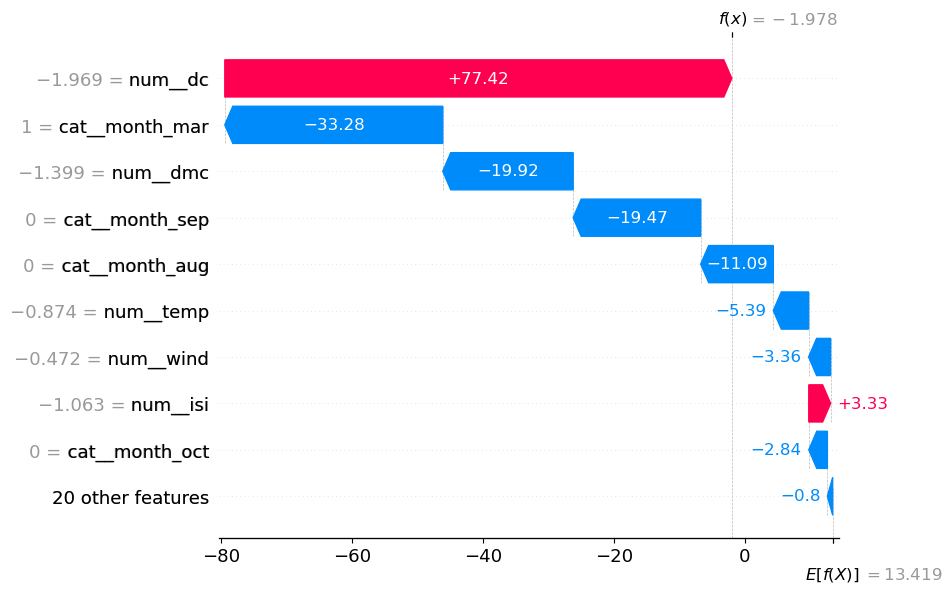

In [66]:
shap.plots.waterfall(shap_values[1])

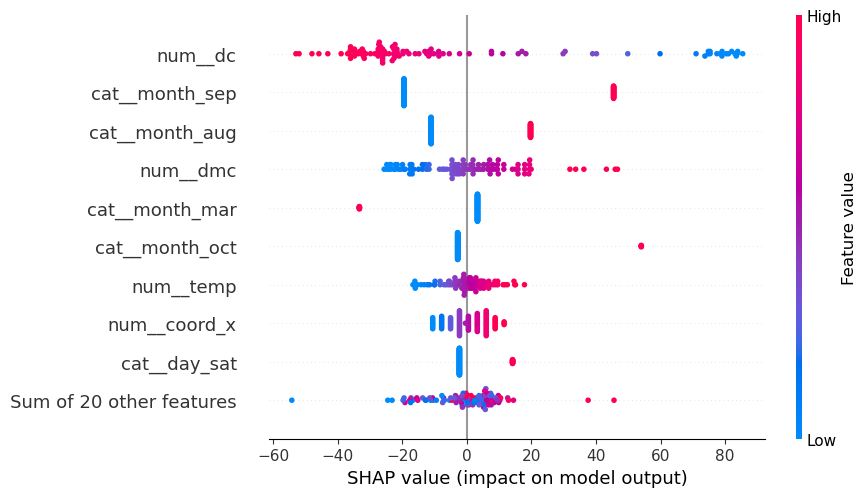

In [67]:
shap.plots.beeswarm(shap_values)

*The most important features and their contributions are as follows:*

- num__dc: Contributed +77.42 to the prediction.
- cat__month_mar: Contributed -33.28 to the prediction.
- num__dmc: Contributed -19.92 to the prediction.
- cat__month_sep: Contributed -19.47 to the prediction.
- cat__month_aug: Contributed -11.09 to the prediction.


*In general across the complete training set*  

*The most important features are:*

- num__dc: This feature shows a high SHAP value variance and impact across the dataset.
- cat__month_sep and cat__month_aug: These categorical features also display high importance.
- num__dmc and num__temp: These numerical features are significant as well.

*The least important features are:*

- cat__day_sat and 
- num__coord_x show less impact compared to others.

Features with consistently low SHAP values, such as cat__day_sat, might be candidates for removal.

*Testing Feature Removal:*
- Iterative Removal and Validation: Remove one feature at a time and retrain the model. Evaluate the model performance using metrics like RMSE, MAE, or any relevant metric.
- Cross-Validation: Use cross-validation to ensure that the model's performance remains consistent or improves after removing features.
- Statistical Tests: Conduct statistical tests to compare model performance before and after feature removal.
- Comparison of SHAP Values: Analyze the SHAP values before and after feature removal to see if the importance distribution changes significantly

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-3`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_3.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/production/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.

# Reference

Cortez,Paulo and Morais,Anbal. (2008). Forest Fires. UCI Machine Learning Repository. https://doi.org/10.24432/C5D88D.